In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [2]:
mean_gray = 0.1307
stddev_gray = 0.3081 # these values are mean and standard deviation of all the mnist dataset !!
transforms = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((mean_gray,),(stddev_gray))])

train_dataset = datasets.MNIST(root = "./data",
                               train = True,
                               transform = transforms,
                               download = True)
test_dataset = datasets.MNIST(root = "./data",
                              train = False,
                              transform = transforms) # not gonna download this, just load it from pytorch

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [3]:
import matplotlib.pyplot as plt

In [4]:
random_image = train_dataset[20][0].numpy()*stddev_gray + mean_gray

In [5]:
random_image

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

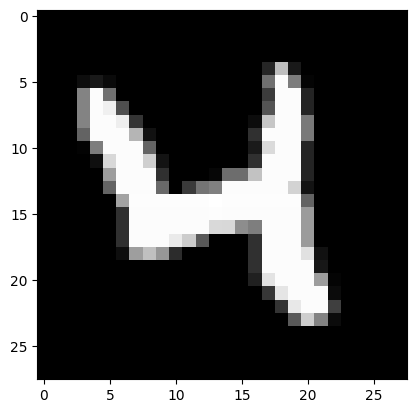

In [8]:
plt.imshow(random_image.reshape(28,28),cmap="gray")

In [9]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    .virtual_documents/Untitled.ipynb
	deleted:    .virtual_documents/torch_intro2.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/cnn_intro-checkpoint.ipynb
	.virtual_documents/cnn_intro.ipynb
	cnn_intro.ipynb
	data/

no changes added to commit (use "git add" and/or "git commit -a")
